In [2]:
from scipy.io import arff
import pandas as pd
import numpy as np

In [ ]:
data = arff.loadarff('/Users/msanch35/Downloads/mtr-datasets/scm20d.arff')
df = pd.DataFrame(data[0])

In [ ]:
df

In [ ]:
X = np.array(df)[:, 0:61]

In [ ]:
y = np.array(df)[:, 61::]

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
df.shape

In [ ]:
df.dropna()

In [ ]:
df

In [3]:
import pickle


with open('/Users/msanch35/Downloads/Timeseries_discovery_test_209/ts_100206_discovery_test.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data.shape

In [ ]:
with open('/Users/msanch35/Downloads/Timeseries_discovery_test_209/ts_101107_discovery_test.pkl', 'rb') as f:
    data = pickle.load(f)

In [ ]:
data.shape

In [ ]:
svd, correlations

In [ ]:
b = np.corrcoef(data)
print(b)

In [ ]:
b.shape

In [ ]:
b[np.triu_indices(b.shape[0])]

In [4]:
df = pd.read_excel(r'/Users/msanch35/Downloads/phenotype_table_discovery.xlsx')

In [14]:
from sklearn.decomposition import TruncatedSVD
data2 = []
for i in df['ID_set']:
    with open('/Users/msanch35/Downloads/Timeseries_discovery_test_209/ts_' + str(i) + '_discovery_test.pkl', 'rb') as f:
        data = pickle.load(f).transpose()
    b = np.corrcoef(data)
    c = TruncatedSVD(n_components=10).fit_transform(b)
    data2.append(c.reshape((c.shape[0]*c.shape[1], )))

In [21]:
!pip install graspy

In [24]:
import graspy
d = graspy.embed.select_dimension(b)

In [32]:
max(d[0])

4

In [25]:
TruncatedSVD(d[0][0]).fit_transform(b).shape

array([[ 1.04747899e+01],
       [ 1.18872362e+01],
       [ 1.02263946e+01],
       [ 1.14160653e+01],
       [ 9.99988573e+00],
       [ 1.30431734e+01],
       [ 9.35384872e+00],
       [ 1.31792633e+01],
       [ 1.32559428e+01],
       [ 1.05784854e+01],
       [ 1.25320073e+01],
       [ 1.24298931e+01],
       [ 1.34657054e+01],
       [ 1.03081766e+01],
       [ 1.19430138e+01],
       [ 1.31792557e+01],
       [ 1.23558596e+01],
       [ 5.40709325e+00],
       [ 1.33259227e+01],
       [ 1.06232459e+01],
       [ 1.09659699e+01],
       [ 1.09787272e+01],
       [ 1.28963595e+01],
       [ 4.86615386e+00],
       [ 1.33591527e+01],
       [ 1.30126194e+01],
       [ 9.50490455e+00],
       [-2.64223480e+00],
       [ 1.24250845e+01],
       [ 2.68644166e+00],
       [ 1.03593227e+01],
       [ 1.28808272e+01],
       [ 4.26513131e+00],
       [ 9.97973204e+00],
       [ 1.32843423e+01],
       [ 1.25056590e+01],
       [ 1.27649695e+01],
       [ 1.38840269e+01],
       [ 1.0

In [ ]:
df = pd.read_excel(r'/Users/msanch35/Downloads/phenotype_table_discovery.xlsx')
df = df.dropna()
data2 = []
for i in df['ID_set']:
    with open('/Users/msanch35/Downloads/Timeseries_discovery_test_209/ts_' + str(i) + '_discovery_test.pkl', 'rb') as f:
        data = pickle.load(f)
    b = np.corrcoef(data)
    data2.append(b[np.triu_indices(b.shape[0])])
X = np.array(df)
y = np.array(data2)

In [30]:
TruncatedSVD(d[0][1]).fit_transform(b)[:,0]

array([ 1.04747899e+01,  1.18872362e+01,  1.02263946e+01,  1.14160653e+01,
        9.99988573e+00,  1.30431734e+01,  9.35384872e+00,  1.31792633e+01,
        1.32559428e+01,  1.05784854e+01,  1.25320073e+01,  1.24298931e+01,
        1.34657054e+01,  1.03081766e+01,  1.19430138e+01,  1.31792557e+01,
        1.23558596e+01,  5.40709325e+00,  1.33259227e+01,  1.06232459e+01,
        1.09659699e+01,  1.09787272e+01,  1.28963595e+01,  4.86615386e+00,
        1.33591527e+01,  1.30126194e+01,  9.50490455e+00, -2.64223480e+00,
        1.24250845e+01,  2.68644166e+00,  1.03593227e+01,  1.28808272e+01,
        4.26513131e+00,  9.97973204e+00,  1.32843423e+01,  1.25056590e+01,
        1.27649695e+01,  1.38840269e+01,  1.07389041e+01,  2.28235521e+00,
        7.04781373e+00,  1.17010299e+01,  1.20796971e+01,  2.27018206e+00,
        1.12392349e+01,  1.33385853e+01,  1.34861467e+01,  5.89651366e+00,
        1.00018490e+01,  1.33398238e+01,  1.24043262e+01,  1.08842763e+01,
        1.16788935e+01,  

In [74]:
X.shape

(209, 498501)

In [ ]:
y.shape

In [ ]:
X_train = X[0:150]
y_train = y[0:150]
X_test = X[150::]
y_test = y[150::]

In [ ]:
np.random.seed(1)
np.random.shuffle(X_train)
np.random.seed(1)
np.random.shuffle(y_train)

In [34]:
data2 = []
for i in df['ID_set']:
    with open('/Users/msanch35/Downloads/Timeseries_discovery_test_209/ts_' 
            + str(i) + '_discovery_test.pkl', 'rb') as f:
        data = pickle.load(f).transpose()
    b = np.corrcoef(data)
    #print(b.shape)
    data2.append(b[np.triu_indices(b.shape[0])])
    #b = np.corrcoef(data)
    #c = TruncatedSVD(n_components=300).fit_transform(b)
    #data2.append(c.reshape((c.shape[0]*c.shape[1], )))
y = np.array(df)
X = np.array(data2)
elbow = max(graspy.embed.select_dimension(X)[0])

In [36]:
TruncatedSVD(n_components=elbow).fit_transform(X).shape

(209, 2)

In [37]:
graspy.embed.select_dimension(X)[0]

[1, 2]

In [80]:
data2 = []
for i in df['ID_set']:
    with open('/Users/msanch35/Downloads/Timeseries_discovery_test_209/ts_' 
            + str(i) + '_discovery_test.pkl', 'rb') as f:
        data = pickle.load(f).transpose()
        print(data.shape)
    b = np.corrcoef(data)
    #print(b.shape)
    data2.append(b[np.triu_indices(b.shape[0])])
    #b = np.corrcoef(data)
    #c = TruncatedSVD(n_components=300).fit_transform(b)
    #data2.append(c.reshape((c.shape[0]*c.shape[1], )))
y = np.array(df)
X = np.array(data2)
print(X.shape)
elbow = max(graspy.embed.select_dimension(X)[0])
svd = TruncatedSVD(n_components=elbow)
X_new = svd.fit_transform(X)
print(X_new.shape, y.shape)

(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998, 2380)
(998

KeyboardInterrupt: 

In [40]:
y

array([[1.00206e+05, 2.70000e+01, 1.00000e+00, ..., 6.00000e+00,
        6.00000e+00, 5.70000e+01],
       [1.01107e+05, 2.20000e+01, 1.00000e+00, ..., 2.00000e+00,
        0.00000e+00, 6.40000e+01],
       [1.01915e+05, 3.50000e+01, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 5.00000e+01],
       ...,
       [9.87074e+05, 2.40000e+01, 1.00000e+00, ..., 2.00000e+00,
        1.00000e+00, 5.00000e+01],
       [9.89987e+05, 3.30000e+01, 1.00000e+00, ..., 4.00000e+00,
        3.00000e+00, 5.00000e+01],
       [9.92673e+05, 3.30000e+01, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 5.00000e+01]])

In [51]:
X = np.array(data2)
svd = TruncatedSVD(n_components=975)
X = svd.fit_transform(X)

KeyboardInterrupt: 

array([2767.24672928,  631.97366012])

In [61]:
svd = TruncatedSVD(n_components=209)
X_new = svd.fit_transform(X)

In [62]:
svd.singular_values_

array([2767.24672928,  631.97366012,  375.16779354,  313.8423227 ,
        206.40593949,  189.38984029,  182.59091476,  166.75119225,
        161.36834915,  154.83772237,  152.21586335,  151.32988375,
        147.07870735,  144.41276058,  142.07800771,  138.39037876,
        136.25632111,  133.44872519,  132.8307472 ,  132.43874595,
        130.10887454,  128.5369982 ,  127.88697317,  127.09277164,
        125.53061763,  125.26002362,  123.21641069,  122.36535837,
        120.81947779,  118.70128131,  118.1614364 ,  117.84231302,
        117.42138986,  115.84474272,  115.12181335,  114.00075717,
        113.07651687,  112.81188673,  111.69194884,  111.25611131,
        110.61302907,  109.45577297,  109.39928149,  109.01272182,
        108.4234688 ,  107.84827036,  106.62954577,  106.35446463,
        105.89734955,  105.34635458,  104.69569396,  104.34592439,
        103.72540499,  103.19326601,  102.71069042,  102.22986184,
        101.74168994,  100.96455923,  100.73548106,  100.33816

<IPython.core.display.Javascript object>


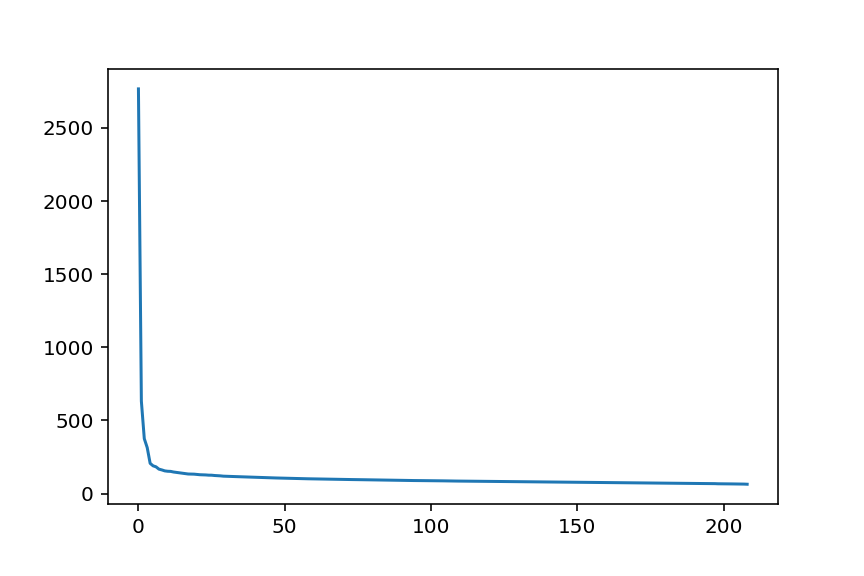

In [73]:
plt.plot(svd.singular_values_)

In [64]:
import matplotlib.pyplot as plt

In [72]:
%matplotlib qt

In [75]:
df = pd.read_excel(r'/Users/msanch35/Downloads/phenotype_table_discovery.xlsx')

In [76]:
df

,ID_set,Age_set,Gender_set (male=1),MMSE_score,PSQI_score,PMAT_CR,PMAT_SI,PMAT_RT,EpiMem,ExeFuCogFl,...,P_External,P_SumTAO,P_TotalS,P_Depress,P_Anxiety,P_Avoid,P_ADHD,P_InAtten,P_Hyperact,P_Antisoc
0,100206,27,1,30,6,20.0,0.0,18574.5,118.78,104.94,...,59,35,64,67,61,67,64,6,6,57
1,101107,22,1,29,9,14.0,5.0,6880.0,97.37,105.69,...,58,15,50,50,51,54,50,2,0,64
2,101915,35,0,29,6,21.0,0.0,51977.0,84.96,90.94,...,43,8,38,51,50,53,50,1,2,50
3,102109,27,1,29,3,21.0,0.0,20678.0,101.07,97.83,...,52,21,51,57,51,54,52,3,1,50
4,102614,23,1,29,5,18.0,1.0,13084.0,130.24,110.24,...,52,12,45,50,51,50,51,1,2,52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,962058,26,1,28,6,10.0,9.0,5485.0,101.12,102.26,...,34,3,31,50,50,51,50,0,0,50
205,965771,32,1,27,3,10.0,9.0,4810.5,113.29,89.33,...,52,16,50,50,52,57,51,1,2,57
206,987074,24,1,30,6,23.0,0.0,20000.0,130.24,102.98,...,38,7,39,50,50,60,51,2,1,50
207,989987,33,1,29,4,20.0,0.0,17317.0,134.81,107.33,...,47,14,43,50,50,50,57,4,3,50


In [77]:
X.shape

(209, 498501)

In [78]:
498501 / 998

499.5